In [1]:
! pip install xgboost

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly

import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance 

# Data Import 

In [3]:
data = pd.read_csv(r'C:\Users\SNEHA\Downloads\airline_passenger_satisfaction.csv')
data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data preprocessing 

## Data type 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

## Check shape of data 

In [5]:
data.shape

(129880, 24)

## Count of Quantitative variables 

In [6]:
for column in ['Gender','customer_type','type_of_travel','customer_class','satisfaction']:
    print(data[column].value_counts())
    print('*****************')
    print('*****************')

Female    65899
Male      63981
Name: Gender, dtype: int64
*****************
*****************
Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64
*****************
*****************
Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64
*****************
*****************
Business    62160
Eco         58309
Eco Plus     9411
Name: customer_class, dtype: int64
*****************
*****************
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64
*****************
*****************


## Identifying outliers in data 

In [7]:
feature =['age','flight_distance','inflight_wifi_service','departure_arrival_time_convenient','ease_of_online_booking',
          'gate_location','inflight_entertainment','onboard_service','leg_room_service','baggage_handling'
          ,'checkin_service','inflight_service','cleanliness','departure_delay_in_minutes','arrival_delay_in_minutes']

In [8]:
list(enumerate(feature))

[(0, 'age'),
 (1, 'flight_distance'),
 (2, 'inflight_wifi_service'),
 (3, 'departure_arrival_time_convenient'),
 (4, 'ease_of_online_booking'),
 (5, 'gate_location'),
 (6, 'inflight_entertainment'),
 (7, 'onboard_service'),
 (8, 'leg_room_service'),
 (9, 'baggage_handling'),
 (10, 'checkin_service'),
 (11, 'inflight_service'),
 (12, 'cleanliness'),
 (13, 'departure_delay_in_minutes'),
 (14, 'arrival_delay_in_minutes')]

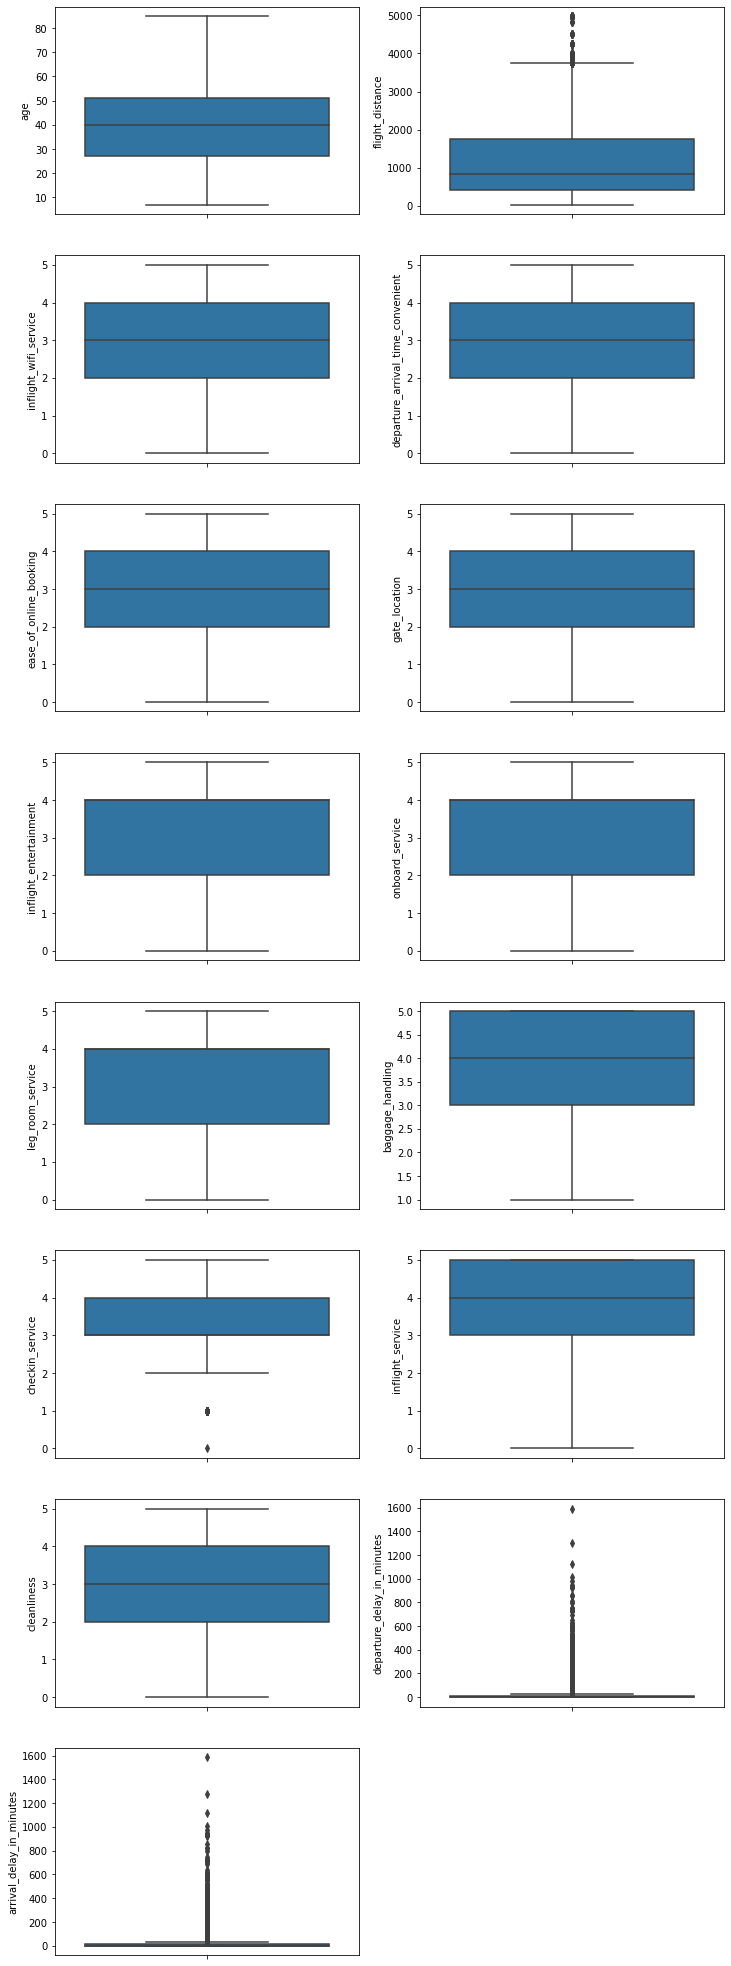

In [9]:
plt.figure(figsize=(12,45))
for i in enumerate(feature):
    plt.subplot(10,2,i[0]+1)
    sns.boxplot(y=i[1],data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Unnamed: 0'),
  Text(1, 0, 'age'),
  Text(2, 0, 'flight_distance'),
  Text(3, 0, 'inflight_wifi_service'),
  Text(4, 0, 'departure_arrival_time_convenient'),
  Text(5, 0, 'ease_of_online_booking'),
  Text(6, 0, 'gate_location'),
  Text(7, 0, 'food_and_drink'),
  Text(8, 0, 'online_boarding'),
  Text(9, 0, 'seat_comfort'),
  Text(10, 0, 'inflight_entertainment'),
  Text(11, 0, 'onboard_service'),
  Text(12, 0, 'leg_room_service'),
  Text(13, 0, 'baggage_handling'),
  Text(14, 0, 'checkin_service'),
  Text(15, 0, 'inflight_service'),
  Text(16, 0, 'cleanliness'),
  Text(17, 0, 'departure_delay_in_minutes'),
  Text(18, 0, 'arrival_delay_in_minutes')])

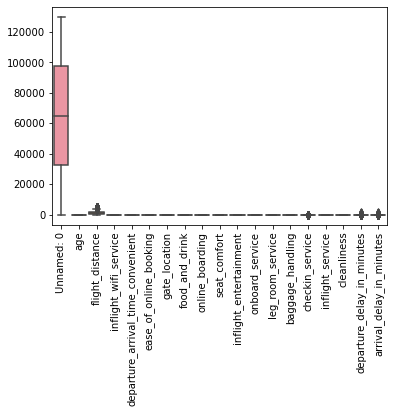

In [10]:
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [11]:
def outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_limit =q3+ 1.5*iqr
    lower_limit =q1- 1.5*iqr
    
    df[col]=np.where(df[col]>upper_limit,upper_limit,
                     np.where(df[col]<lower_limit,lower_limit,df[col]))
    return df[col]

0         13.0
1         25.0
2         26.0
3         25.0
4         61.0
          ... 
129875    34.0
129876    23.0
129877    17.0
129878    14.0
129879    42.0
Name: age, Length: 129880, dtype: float64
0          460.0
1          235.0
2         1142.0
3          562.0
4          214.0
           ...  
129875     526.0
129876     646.0
129877     828.0
129878    1127.0
129879     264.0
Name: flight_distance, Length: 129880, dtype: float64
0         3.0
1         3.0
2         2.0
3         2.0
4         3.0
         ... 
129875    3.0
129876    4.0
129877    2.0
129878    3.0
129879    2.0
Name: inflight_wifi_service, Length: 129880, dtype: float64
0         4.0
1         2.0
2         2.0
3         5.0
4         3.0
         ... 
129875    3.0
129876    4.0
129877    5.0
129878    3.0
129879    5.0
Name: departure_arrival_time_convenient, Length: 129880, dtype: float64
0         3.0
1         3.0
2         2.0
3         5.0
4         3.0
         ... 
129875    3.0
129876    4.0


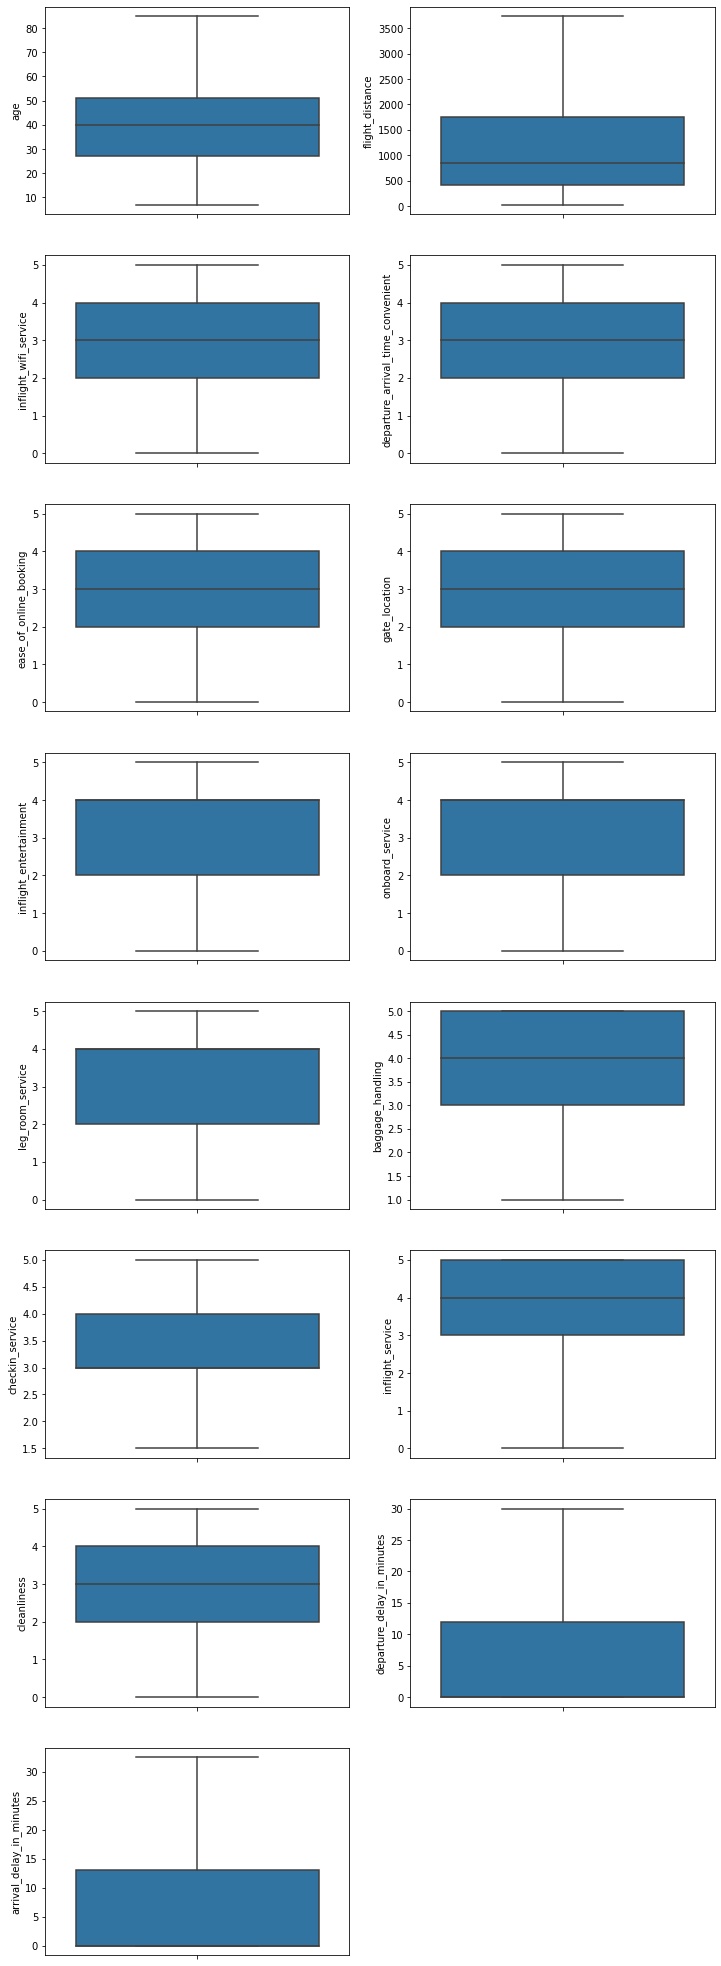

In [12]:
for x in feature:
    print(outliers(data,x))
    
plt.figure(figsize=(12,45))
for i in enumerate(feature):
    plt.subplot(10,2,i[0]+1)
    sns.boxplot(y=i[1],data=data)

## Identifying missing values

In [13]:
data.isnull().sum()

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [14]:
data['arrival_delay_in_minutes'].fillna(data['arrival_delay_in_minutes'].mean(),inplace=True)

In [15]:
data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,...,1.0,1.0,5.0,3.0,1.5,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,3,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.5,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [16]:
data.isnull().sum()

Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

# EDA 

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

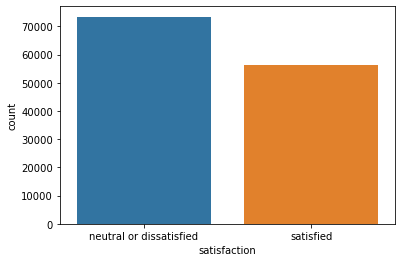

In [17]:
sns.countplot(x='satisfaction',data=data)

## Quantitative variables 

In [18]:
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,13.0,460.0,3.0,4.0,3.0,1.0,5,3,5,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1,25.0,235.0,3.0,2.0,3.0,3.0,1,3,1,1.0,1.0,5.0,3.0,1.5,4.0,1.0,1.0,6.0
2,2,26.0,1142.0,2.0,2.0,2.0,2.0,5,5,5,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,3,25.0,562.0,2.0,5.0,5.0,5.0,2,2,2,2.0,2.0,5.0,3.0,1.5,4.0,2.0,11.0,9.0
4,4,61.0,214.0,3.0,3.0,3.0,3.0,4,5,5,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0


## Qualitative variables 

In [19]:
data_dummies = data[data.select_dtypes(include=['object']).columns.tolist()]
data_dummies.head()

,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [20]:
from sklearn.preprocessing import LabelEncoder
data_dummies = data_dummies.apply(LabelEncoder().fit_transform)
data_dummies.head()

,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,1,0,1,2,0
1,1,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,1,0,0,0,1


In [21]:
data_num.head()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,13.0,460.0,3.0,4.0,3.0,1.0,5,3,5,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1,25.0,235.0,3.0,2.0,3.0,3.0,1,3,1,1.0,1.0,5.0,3.0,1.5,4.0,1.0,1.0,6.0
2,2,26.0,1142.0,2.0,2.0,2.0,2.0,5,5,5,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,3,25.0,562.0,2.0,5.0,5.0,5.0,2,2,2,2.0,2.0,5.0,3.0,1.5,4.0,2.0,11.0,9.0
4,4,61.0,214.0,3.0,3.0,3.0,3.0,4,5,5,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0


# 1. PCA

In [22]:
x_train = data_num
x_train.head()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,13.0,460.0,3.0,4.0,3.0,1.0,5,3,5,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1,25.0,235.0,3.0,2.0,3.0,3.0,1,3,1,1.0,1.0,5.0,3.0,1.5,4.0,1.0,1.0,6.0
2,2,26.0,1142.0,2.0,2.0,2.0,2.0,5,5,5,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,3,25.0,562.0,2.0,5.0,5.0,5.0,2,2,2,2.0,2.0,5.0,3.0,1.5,4.0,2.0,11.0,9.0
4,4,61.0,214.0,3.0,3.0,3.0,3.0,4,5,5,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0


## PCA is affected by scale so we need to scale the features in data before applying PCA

In [23]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train_1 = sc.fit_transform(x_train)

### Mean 

In [24]:
x_train_1.mean(axis=0)

array([ 2.80103080e-17, -8.98572870e-17, -9.86925697e-17, -1.42239845e-18,
        5.53094168e-17, -1.39559171e-16, -1.15050152e-16,  5.50358787e-17,
        1.40379786e-16,  1.96947478e-18,  2.18830531e-18,  1.13190092e-16,
        6.65791892e-17, -6.72630346e-17,  1.08102283e-16,  1.15857090e-16,
        4.79238864e-17, -3.80765125e-17, -6.08348878e-17])

## Standard deviation

In [25]:
x_train_1.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [26]:
x_train.head()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,13.0,460.0,3.0,4.0,3.0,1.0,5,3,5,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1,25.0,235.0,3.0,2.0,3.0,3.0,1,3,1,1.0,1.0,5.0,3.0,1.5,4.0,1.0,1.0,6.0
2,2,26.0,1142.0,2.0,2.0,2.0,2.0,5,5,5,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,3,25.0,562.0,2.0,5.0,5.0,5.0,2,2,2,2.0,2.0,5.0,3.0,1.5,4.0,2.0,11.0,9.0
4,4,61.0,214.0,3.0,3.0,3.0,3.0,4,5,5,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0


In [27]:
x_train_1

array([[-1.73203747, -1.74796145, -0.73553458, ...,  1.30448651,
         1.57175488,  0.84146653],
       [-1.7320108 , -0.954274  , -0.96317731, ..., -1.74040158,
        -0.56921135, -0.1616119 ],
       [-1.73198413, -0.88813338, -0.04552418, ...,  1.30448651,
        -0.65841827, -0.66315112],
       ...,
       [ 1.73198413, -1.48339897, -0.36321225, ..., -0.97917956,
        -0.65841827, -0.66315112],
       [ 1.7320108 , -1.68182083, -0.06070036, ...,  0.54326449,
        -0.65841827, -0.66315112],
       [ 1.73203747,  0.17011655, -0.93383669, ..., -1.74040158,
        -0.65841827, -0.66315112]])

## Number of variables in original dataset

In [28]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 10) 
  
principalComponents= pca.fit(x_train_1)

In [29]:
principalComponents.explained_variance_

array([3.86218839, 2.3724454 , 2.18267768, 1.83023611, 1.2427234 ,
       1.00035978, 0.96034192, 0.93082761, 0.89063298, 0.69116367])

In [30]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 7) 
  
principalComponents= pca.fit(x_train_1)

In [31]:
principalComponents.explained_variance_

array([3.86218839, 2.3724454 , 2.18267768, 1.83023611, 1.24272336,
       1.00035977, 0.96034174])

In [32]:
principalComponents.explained_variance_ratio_

array([0.20327151, 0.12486459, 0.11487689, 0.09632747, 0.06540599,
       0.05265011, 0.05054391])

In [33]:
principalComponents.mean_

array([ 2.80103080e-17, -8.98572870e-17, -9.86925697e-17, -1.42239845e-18,
        5.53094168e-17, -1.39559171e-16, -1.15050152e-16,  5.50358787e-17,
        1.40379786e-16,  1.96947478e-18,  2.18830531e-18,  1.13190092e-16,
        6.65791892e-17, -6.72630346e-17,  1.08102283e-16,  1.15857090e-16,
        4.79238864e-17, -3.80765125e-17, -6.08348878e-17])

In [34]:
principalComponents.get_covariance()

array([[ 9.97232670e-01,  2.64231098e-02,  9.86538017e-03,
        -8.69737022e-03,  2.69031259e-03, -2.72313483e-03,
         1.52237795e-02,  1.61526942e-03, -8.68589925e-03,
         2.57526748e-03,  6.89458362e-03,  4.34115571e-03,
         7.22924962e-03,  8.01876439e-04, -2.10591782e-02,
         2.74704626e-03, -1.25474547e-03, -5.39786561e-03,
        -3.90562166e-03],
       [ 2.64231098e-02,  7.82577463e-01,  2.03162082e-01,
         2.61101919e-02,  2.81952474e-02,  4.26118380e-02,
        -3.89273900e-02,  2.13184640e-02,  2.48359381e-01,
         1.59478812e-01,  1.37737440e-02,  2.30764539e-02,
         4.09574230e-03, -5.95504197e-02,  2.01813395e-01,
        -6.43267480e-02,  7.55623991e-02, -5.81902988e-03,
        -9.63038679e-03],
       [ 9.86538017e-03,  2.03162082e-01,  7.10163411e-01,
         1.02686092e-01, -8.11202678e-02,  7.90753392e-02,
        -1.03930046e-01,  4.12117333e-02,  2.87632356e-01,
         1.50353141e-01,  1.20740795e-01,  1.22947718e-01,
    

In [35]:
principalComponents.components_  

array([[-1.23597333e-03, -6.98894705e-02, -1.21038690e-01,
        -2.29408827e-01, -9.64055104e-02, -1.61002303e-01,
        -6.24851583e-02, -3.01688431e-01, -2.86269838e-01,
        -3.45199704e-01, -4.22313116e-01, -2.74517155e-01,
        -2.21564959e-01, -2.55985153e-01, -1.80437849e-01,
        -2.59290436e-01, -3.51513938e-01,  4.46130971e-02,
         5.40059804e-02],
       [ 2.26969437e-04, -9.62470009e-03,  1.95779870e-02,
        -4.49843602e-01, -4.19069868e-01, -5.35546365e-01,
        -4.30749207e-01,  1.59707921e-01, -1.52848500e-01,
         1.54088443e-01,  1.76510667e-01,  6.62215232e-02,
         1.15272792e-02,  5.38193520e-02,  4.82557072e-02,
         6.04989351e-02,  1.77505253e-01, -1.50022422e-02,
        -1.68893903e-02],
       [-1.46992504e-04,  1.03052244e-01,  9.94568699e-03,
         4.77450704e-02, -2.23684576e-02,  5.04540616e-02,
         3.88520035e-02,  3.38744529e-01,  1.70645141e-01,
         3.14375806e-01,  6.52521397e-02, -3.79376885e-01,
    

In [36]:
transformed_data=principalComponents.fit_transform(x_train_1)

In [37]:
print("original shape:   ", x_train_1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (129880, 19)
transformed shape: (129880, 7)


In [38]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4',
                         'principal component 5','principal component 6','principal component 7'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-1.998436,1.203477,0.311188,1.855094,1.926707,-1.806166,-0.084954
1,3.272651,-1.239596,-1.288579,-0.673421,0.138999,-1.803538,-1.986563
2,-2.161470,1.922379,0.876754,-0.806351,0.455240,-1.815094,-0.199169
3,1.867626,-2.504813,-0.830399,0.258655,1.408971,-1.625176,-0.729879
4,-0.792986,-0.240845,0.930634,-0.957348,-0.753330,-1.711638,0.216809


### Check the orthagonal property (all principal components must be independent)

In [39]:
Correlation=round(principalDf.corr(),3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
principal component 1,1.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000
principal component 2,-0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
principal component 3,-0.000000,-0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000
principal component 4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000
principal component 5,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.000000,0.000000
principal component 6,-0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,-0.000000
principal component 7,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,1.000000


In [40]:
data_num.columns

Index(['Unnamed: 0', 'age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')

In [41]:
numeric_predictors = data_num.columns
scaled_train=pd.DataFrame(x_train_1,columns = numeric_predictors )
scaled_train.head()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,-1.732037,-1.747961,-0.735535,0.204090,0.617265,0.173445,-1.546267,1.349867,-0.187037,1.181428,1.230787,0.479357,-0.266574,0.311762,0.544844,1.153946,1.304487,1.571755,0.841467
1,-1.732011,-0.954274,-0.963177,0.204090,-0.692719,0.173445,0.018048,-1.657814,-0.187037,-1.850520,-1.767616,-1.851475,1.252898,-0.535681,-1.611383,0.304086,-1.740402,-0.569211,-0.161612
2,-1.731984,-0.888133,-0.045524,-0.548166,-0.692719,-0.539957,-0.764109,1.349867,1.293662,1.181428,1.230787,0.479357,-0.266574,0.311762,0.544844,0.304086,1.304487,-0.658418,-0.663151
3,-1.731957,-0.954274,-0.632337,-0.548166,1.272257,1.600249,1.582364,-0.905894,-0.927386,-1.092533,-1.018015,-1.074531,1.252898,-0.535681,-1.611383,0.304086,-0.979180,0.322858,0.089158
4,-1.731931,1.426788,-0.984424,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,1.181428,-0.268414,-0.297587,0.493162,0.311762,-0.317647,-0.545774,-0.217958,-0.658418,-0.663151


In [42]:
final_data=pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-1.732037,-1.747961,-0.735535,0.204090,0.617265,0.173445,-1.546267,1.349867,-0.187037,1.181428,...,1.304487,1.571755,0.841467,-1.998436,1.203477,0.311188,1.855094,1.926707,-1.806166,-0.084954
1,-1.732011,-0.954274,-0.963177,0.204090,-0.692719,0.173445,0.018048,-1.657814,-0.187037,-1.850520,...,-1.740402,-0.569211,-0.161612,3.272651,-1.239596,-1.288579,-0.673421,0.138999,-1.803538,-1.986563
2,-1.731984,-0.888133,-0.045524,-0.548166,-0.692719,-0.539957,-0.764109,1.349867,1.293662,1.181428,...,1.304487,-0.658418,-0.663151,-2.161470,1.922379,0.876754,-0.806351,0.455240,-1.815094,-0.199169
3,-1.731957,-0.954274,-0.632337,-0.548166,1.272257,1.600249,1.582364,-0.905894,-0.927386,-1.092533,...,-0.979180,0.322858,0.089158,1.867626,-2.504813,-0.830399,0.258655,1.408971,-1.625176,-0.729879
4,-1.731931,1.426788,-0.984424,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,1.181428,...,-0.217958,-0.658418,-0.663151,-0.792986,-0.240845,0.930634,-0.957348,-0.753330,-1.711638,0.216809


In [43]:
def color_negative_red(value):
    if value < -70:
        color = 'red'
    elif value > 70:
        color = 'blue'
    else:
        color = 'black'
    return 'color: %s' % color

In [44]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix=Correlation_Matrix.iloc[0:18,19:26]    # abs() function is used to remove negative sign, abs(Correlation_Matrix)
Correlation_Matrix        
Correlation_Matrix.style.applymap(color_negative_red)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
Unnamed: 0,-0.200000,0.000000,-0.000000,-0.900000,-2.700000,99.600000,-3.500000
age,-13.700000,-1.500000,15.200000,-1.400000,-58.900000,4.200000,35.700000
flight_distance,-23.800000,3.000000,1.500000,2.800000,-54.300000,-0.400000,-14.800000
inflight_wifi_service,-45.100000,-69.300000,7.100000,-1.200000,-1.200000,-2.700000,-26.500000
departure_arrival_time_convenient,-18.900000,-64.500000,-3.300000,0.800000,21.100000,2.600000,42.800000
ease_of_online_booking,-31.600000,-82.500000,7.500000,-0.400000,-5.300000,-1.400000,-18.200000
gate_location,-12.300000,-66.300000,5.700000,1.200000,29.000000,4.400000,20.300000
food_and_drink,-59.300000,24.600000,50.000000,0.900000,28.200000,0.900000,-1.800000
online_boarding,-56.300000,-23.500000,25.200000,-1.800000,-47.400000,-3.800000,-14.800000
seat_comfort,-67.800000,23.700000,46.400000,1.400000,-1.400000,0.500000,10.400000


In [45]:
data_combined = pd.concat([principalDf,data_dummies],axis=1)
data_combined.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,-1.998436,1.203477,0.311188,1.855094,1.926707,-1.806166,-0.084954,1,0,1,2,0
1,3.272651,-1.239596,-1.288579,-0.673421,0.138999,-1.803538,-1.986563,1,1,0,0,0
2,-2.161470,1.922379,0.876754,-0.806351,0.455240,-1.815094,-0.199169,0,0,0,0,1
3,1.867626,-2.504813,-0.830399,0.258655,1.408971,-1.625176,-0.729879,0,0,0,0,0
4,-0.792986,-0.240845,0.930634,-0.957348,-0.753330,-1.711638,0.216809,1,0,0,0,1


### Scree plot

In [46]:
from sklearn.decomposition import PCA

pca = PCA(.90)

In [47]:
principalComponents2= pca.fit_transform(x_train_1)

In [48]:
pca.explained_variance_

array([3.86218839, 2.3724454 , 2.18267768, 1.83023611, 1.2427234 ,
       1.00035978, 0.96034192, 0.93082761, 0.89063298, 0.69116367,
       0.53032249, 0.47796109, 0.44628583])

In [49]:
pca.explained_variance_ratio_

array([0.20327151, 0.12486459, 0.11487689, 0.09632747, 0.06540599,
       0.05265011, 0.05054392, 0.04899055, 0.04687506, 0.03637676,
       0.0279115 , 0.02515565, 0.02348855])

In [50]:
a=pd.DataFrame(data=pca.explained_variance_,columns = ['Eigen_Values'])
a["PCA"]=[1,2,3,4,5,6,7,8,9,10,11,12,13]
a

,Eigen_Values,PCA
0,3.862188,1
1,2.372445,2
2,2.182678,3
3,1.830236,4
4,1.242723,5
5,1.000360,6
6,0.960342,7
7,0.930828,8
8,0.890633,9
9,0.691164,10


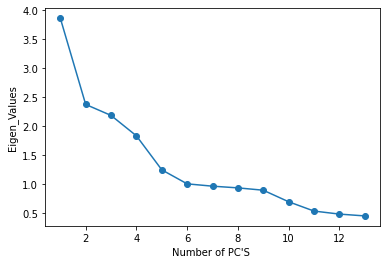

In [51]:
import matplotlib.pyplot as plt
plt.plot( 'PCA', 'Eigen_Values', data=a, linestyle='-', marker='o')
plt.xlabel("Number of PC'S ")
plt.ylabel("Eigen_Values")
plt.show()

# 2. Logistic Regression 

## Step 1 : Data partition 

In [52]:
x = data_combined.drop('satisfaction',axis=1)
y = data_combined[['satisfaction']]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=79)

In [53]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 103904.
The number of samples into the test data is 25976.


In [54]:
train =pd.concat([x_train,y_train],axis=1)
train.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction
76983,3.168699,0.741005,2.487935,1.610520,-2.069707,0.220641,0.431652,0,0,0,0,0
42873,-1.837099,3.106867,-1.322228,0.597503,-1.037549,-0.597507,-0.152216,0,0,0,0,1
93406,-0.351579,1.481675,2.255688,2.394270,0.869141,0.875929,1.467115,0,0,1,1,0
124014,-1.106572,2.961828,-0.753886,-0.004592,-0.819187,1.449600,-0.123053,0,0,0,0,1
16842,-1.759783,3.025424,-1.537975,1.862333,-1.911063,-1.321830,-0.678671,0,0,0,0,1


## Step 2: Hypothesis

#### H0 : There is no relationship between satisfaction and all independent variables

#### vs

#### H1 : There is relationship between satisfaction and all independent variables 

##### Alpha =0.05

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg =LogisticRegression()
output =logreg.fit(x_train,y_train)

C:\Users\SNEHA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
output.intercept_

array([0.82997804])

In [57]:
output.coef_

array([[-0.80898088, -0.0105624 , -0.15885973, -0.14490276, -0.42110368,
        -0.06501699, -0.15057462,  0.0582897 , -1.570325  , -2.69126762,
        -0.37566806]])

In [58]:
output.n_features_in_

11

## Step 3 : Prediction on train data

In [59]:
train = pd.concat([x_train,y_train],axis=1)
train.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction
76983,3.168699,0.741005,2.487935,1.610520,-2.069707,0.220641,0.431652,0,0,0,0,0
42873,-1.837099,3.106867,-1.322228,0.597503,-1.037549,-0.597507,-0.152216,0,0,0,0,1
93406,-0.351579,1.481675,2.255688,2.394270,0.869141,0.875929,1.467115,0,0,1,1,0
124014,-1.106572,2.961828,-0.753886,-0.004592,-0.819187,1.449600,-0.123053,0,0,0,0,1
16842,-1.759783,3.025424,-1.537975,1.862333,-1.911063,-1.321830,-0.678671,0,0,0,0,1


In [60]:
train['Predicted_1'] =output.predict(x_train)
train.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction,Predicted_1
76983,3.168699,0.741005,2.487935,1.610520,-2.069707,0.220641,0.431652,0,0,0,0,0,0
42873,-1.837099,3.106867,-1.322228,0.597503,-1.037549,-0.597507,-0.152216,0,0,0,0,1,1
93406,-0.351579,1.481675,2.255688,2.394270,0.869141,0.875929,1.467115,0,0,1,1,0,0
124014,-1.106572,2.961828,-0.753886,-0.004592,-0.819187,1.449600,-0.123053,0,0,0,0,1,1
16842,-1.759783,3.025424,-1.537975,1.862333,-1.911063,-1.321830,-0.678671,0,0,0,0,1,1


## Step 4: Prediction on test data

In [61]:
test = pd.concat([x_test,y_test],axis=1)
test.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction
71455,0.131252,0.242539,-1.014241,-0.879770,-1.705458,0.198477,-1.404012,1,0,0,0,0
56249,-1.417215,-1.010889,-0.559681,-0.872311,0.119937,-0.272985,0.742669,1,1,0,0,0
10678,-0.612955,-1.217439,-1.137998,-0.874747,0.980962,-1.486664,0.477792,1,0,1,1,0
103726,1.150681,-1.263499,1.075118,2.778795,-0.166516,1.050568,-1.458998,0,1,0,1,0
109383,-1.714199,3.119444,-1.496913,-0.697477,0.020742,1.132212,-0.346142,0,0,0,0,1


In [62]:
test['Predicted_1']=output.predict(x_test)
test.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction,Predicted_1
71455,0.131252,0.242539,-1.014241,-0.879770,-1.705458,0.198477,-1.404012,1,0,0,0,0,1
56249,-1.417215,-1.010889,-0.559681,-0.872311,0.119937,-0.272985,0.742669,1,1,0,0,0,1
10678,-0.612955,-1.217439,-1.137998,-0.874747,0.980962,-1.486664,0.477792,1,0,1,1,0,0
103726,1.150681,-1.263499,1.075118,2.778795,-0.166516,1.050568,-1.458998,0,1,0,1,0,0
109383,-1.714199,3.119444,-1.496913,-0.697477,0.020742,1.132212,-0.346142,0,0,0,0,1,1


## Step 5 : Classification report 

In [63]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'],train['Predicted_1']))
from sklearn.metrics import classification_report
print(classification_report(test['satisfaction'],test['Predicted_1']))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     58881
           1       0.85      0.82      0.83     45023

    accuracy                           0.86    103904
   macro avg       0.86      0.85      0.86    103904
weighted avg       0.86      0.86      0.86    103904

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14571
           1       0.86      0.81      0.84     11405

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



#### Accuracy of model is 86% 

# 3. Random forest 

## Step 1 : Model building 

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=8,
                              criterion='gini',
                              max_depth=4,
                              min_samples_split=100,
                              min_samples_leaf=50,
                              max_features='sqrt')
model.fit(x_train,y_train)

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_3980\1769431604.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=8)

## Step 2 : Important features

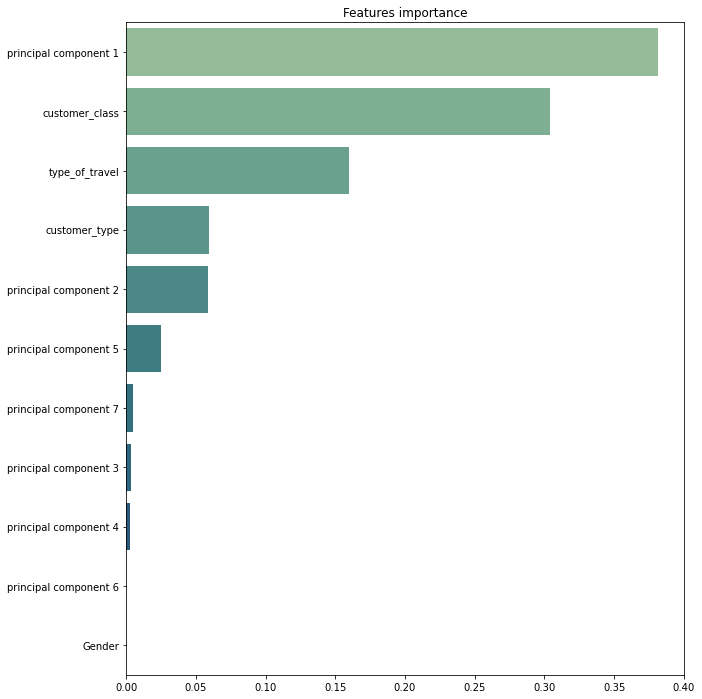

In [65]:
imp = pd.Series(data=model.feature_importances_,index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title('Features importance')
ax = sns.barplot(y=imp.index,x=imp.values,palette='crest',orient='h')

## Step 3 : Plotting Tree

In [66]:
!pip install pydot

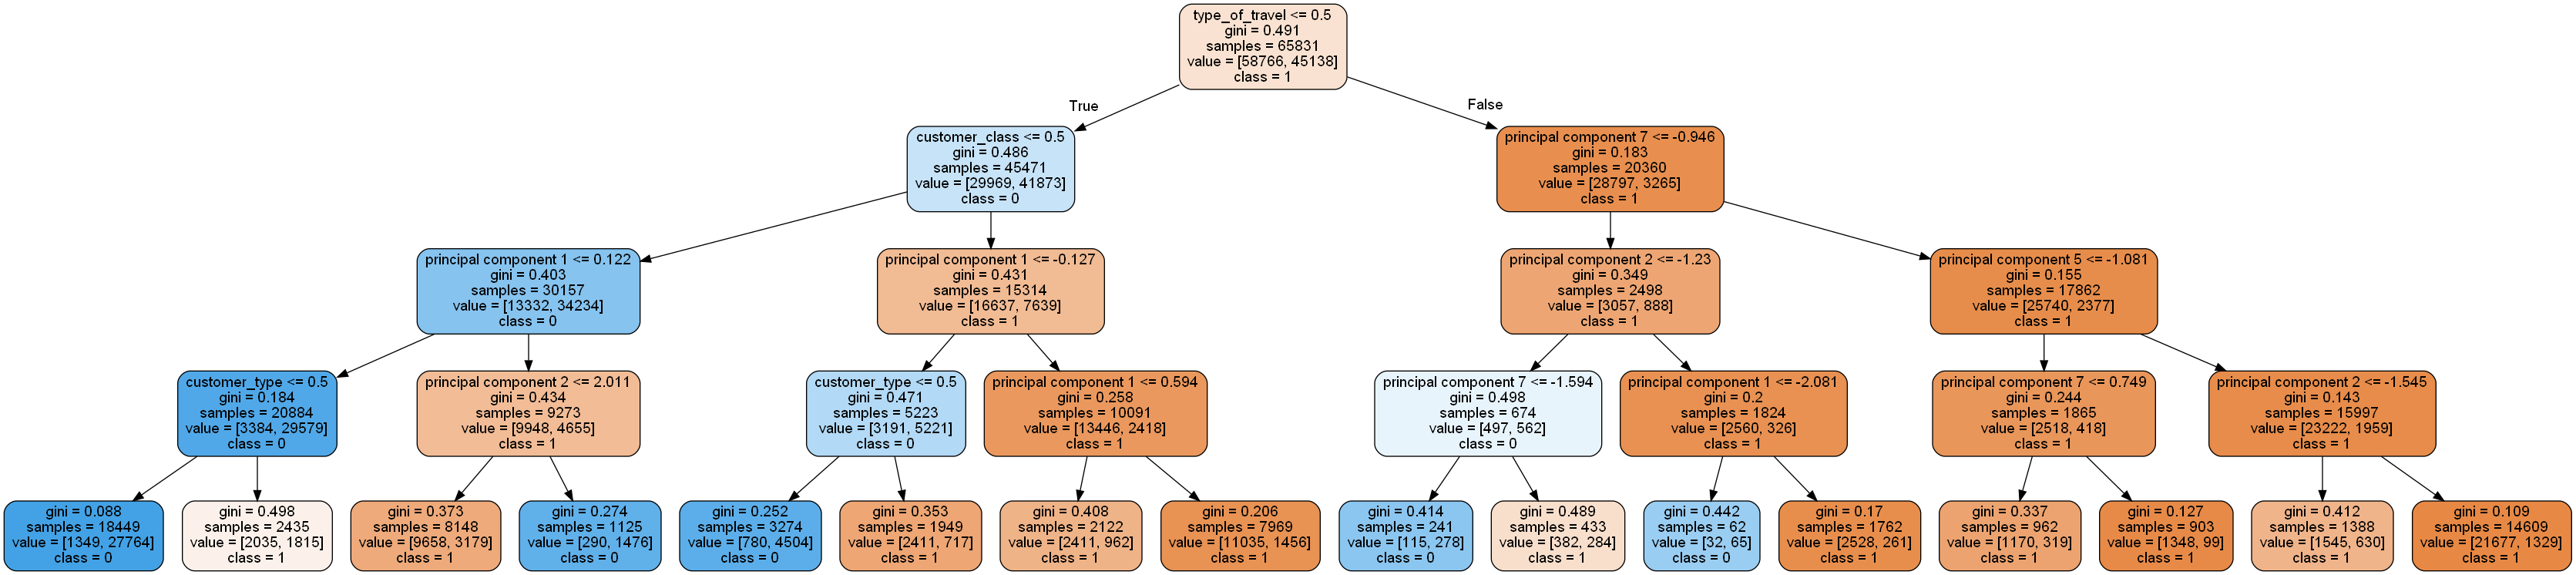

In [67]:
from sklearn.tree import export_graphviz
import pydot

tree= model.estimators_[5]
satisfaction=['1','0']

feature_list =list(x.columns)
export_graphviz(tree,out_file='tree.dot',
               feature_names=feature_list,
               leaves_parallel=True,
               class_names=satisfaction,
               rounded=True,
               filled=True)

(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree_1.png')
from IPython.display import Image
Image(filename='tree_1.png')

## Step 4 : Prediction on train data

In [68]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction
76983,3.168699,0.741005,2.487935,1.610520,-2.069707,0.220641,0.431652,0,0,0,0,0
42873,-1.837099,3.106867,-1.322228,0.597503,-1.037549,-0.597507,-0.152216,0,0,0,0,1
93406,-0.351579,1.481675,2.255688,2.394270,0.869141,0.875929,1.467115,0,0,1,1,0
124014,-1.106572,2.961828,-0.753886,-0.004592,-0.819187,1.449600,-0.123053,0,0,0,0,1
16842,-1.759783,3.025424,-1.537975,1.862333,-1.911063,-1.321830,-0.678671,0,0,0,0,1


In [69]:
train['Predicted_4']=model.predict(x_train)
train.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction,Predicted_4
76983,3.168699,0.741005,2.487935,1.610520,-2.069707,0.220641,0.431652,0,0,0,0,0,0
42873,-1.837099,3.106867,-1.322228,0.597503,-1.037549,-0.597507,-0.152216,0,0,0,0,1,1
93406,-0.351579,1.481675,2.255688,2.394270,0.869141,0.875929,1.467115,0,0,1,1,0,0
124014,-1.106572,2.961828,-0.753886,-0.004592,-0.819187,1.449600,-0.123053,0,0,0,0,1,1
16842,-1.759783,3.025424,-1.537975,1.862333,-1.911063,-1.321830,-0.678671,0,0,0,0,1,1


## Step 5: Prediction on test data 

In [70]:
test=pd.concat([x_test,y_test],axis=1)
test.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction
71455,0.131252,0.242539,-1.014241,-0.879770,-1.705458,0.198477,-1.404012,1,0,0,0,0
56249,-1.417215,-1.010889,-0.559681,-0.872311,0.119937,-0.272985,0.742669,1,1,0,0,0
10678,-0.612955,-1.217439,-1.137998,-0.874747,0.980962,-1.486664,0.477792,1,0,1,1,0
103726,1.150681,-1.263499,1.075118,2.778795,-0.166516,1.050568,-1.458998,0,1,0,1,0
109383,-1.714199,3.119444,-1.496913,-0.697477,0.020742,1.132212,-0.346142,0,0,0,0,1


In [71]:
test['Predicted_4']= model.predict(x_test)
test.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction,Predicted_4
71455,0.131252,0.242539,-1.014241,-0.879770,-1.705458,0.198477,-1.404012,1,0,0,0,0,1
56249,-1.417215,-1.010889,-0.559681,-0.872311,0.119937,-0.272985,0.742669,1,1,0,0,0,1
10678,-0.612955,-1.217439,-1.137998,-0.874747,0.980962,-1.486664,0.477792,1,0,1,1,0,0
103726,1.150681,-1.263499,1.075118,2.778795,-0.166516,1.050568,-1.458998,0,1,0,1,0,0
109383,-1.714199,3.119444,-1.496913,-0.697477,0.020742,1.132212,-0.346142,0,0,0,0,1,1


## Step 6: Classification report for test data 

In [72]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'], train['Predicted_4']))
from sklearn.metrics import classification_report
print(classification_report(y_test, test['Predicted_4']))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     58881
           1       0.92      0.77      0.84     45023

    accuracy                           0.87    103904
   macro avg       0.88      0.86      0.87    103904
weighted avg       0.88      0.87      0.87    103904

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     14571
           1       0.92      0.77      0.84     11405

    accuracy                           0.87     25976
   macro avg       0.88      0.86      0.86     25976
weighted avg       0.88      0.87      0.87     25976



# 4. Xtreme Boosting 

## Step 1 : Model building

In [73]:
model_parameters = { 
        'n_estimators':[10, 50, 100],  # number of trees
        'max_depth': [3, 5, 10],                 # maximum number of branches in each tree 
        'min_samples_leaf': [10,5,15]            # minimum number of Sample in each child node or leaf 
                  }

In [74]:
from sklearn.model_selection import GridSearchCV
model = XGBClassifier(reg_lambda=0)   
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[21:37:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [75]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 50}


In [76]:
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(x_train, y_train)

[21:37:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              min_samples_leaf=10, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

## Step 2 : Prediction

In [77]:
train_pred = final_mod.predict(x_train)
test_pred = final_mod.predict(x_test)

## Step 3 : Tree Plot

In [78]:
node_params = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
leaf_params = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

In [79]:
! pip install graphviz

In [80]:
xgb.to_graphviz(final_mod,num_trees=9,size="4,5",
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

## Step 4 : Classification report

In [81]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58881
           1       0.97      0.94      0.96     45023

    accuracy                           0.96    103904
   macro avg       0.96      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     14571
           1       0.92      0.89      0.91     11405

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



## 5.Naive Bayes Classifier

## Step 1: Model building

In [82]:
from sklearn.naive_bayes import BernoulliNB

model= BernoulliNB(alpha=0)   

model.fit(x_train, y_train)

C:\Users\SNEHA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SNEHA\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


BernoulliNB(alpha=0)

## Step 2: Prediction on train data

In [83]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction
76983,3.168699,0.741005,2.487935,1.610520,-2.069707,0.220641,0.431652,0,0,0,0,0
42873,-1.837099,3.106867,-1.322228,0.597503,-1.037549,-0.597507,-0.152216,0,0,0,0,1
93406,-0.351579,1.481675,2.255688,2.394270,0.869141,0.875929,1.467115,0,0,1,1,0
124014,-1.106572,2.961828,-0.753886,-0.004592,-0.819187,1.449600,-0.123053,0,0,0,0,1
16842,-1.759783,3.025424,-1.537975,1.862333,-1.911063,-1.321830,-0.678671,0,0,0,0,1


In [84]:
train['Predicted_5']=model.predict(x_train)
train.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction,Predicted_5
76983,3.168699,0.741005,2.487935,1.610520,-2.069707,0.220641,0.431652,0,0,0,0,0,1
42873,-1.837099,3.106867,-1.322228,0.597503,-1.037549,-0.597507,-0.152216,0,0,0,0,1,1
93406,-0.351579,1.481675,2.255688,2.394270,0.869141,0.875929,1.467115,0,0,1,1,0,0
124014,-1.106572,2.961828,-0.753886,-0.004592,-0.819187,1.449600,-0.123053,0,0,0,0,1,1
16842,-1.759783,3.025424,-1.537975,1.862333,-1.911063,-1.321830,-0.678671,0,0,0,0,1,1


## Step 3: Prediction on test data

In [85]:
test=pd.concat([x_test,y_test],axis=1)
test.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction
71455,0.131252,0.242539,-1.014241,-0.879770,-1.705458,0.198477,-1.404012,1,0,0,0,0
56249,-1.417215,-1.010889,-0.559681,-0.872311,0.119937,-0.272985,0.742669,1,1,0,0,0
10678,-0.612955,-1.217439,-1.137998,-0.874747,0.980962,-1.486664,0.477792,1,0,1,1,0
103726,1.150681,-1.263499,1.075118,2.778795,-0.166516,1.050568,-1.458998,0,1,0,1,0
109383,-1.714199,3.119444,-1.496913,-0.697477,0.020742,1.132212,-0.346142,0,0,0,0,1


In [86]:
pd.DataFrame(model.predict_proba(x_test))[1]

0        0.757769
1        0.750195
2        0.069481
3        0.063351
4        0.913058
           ...   
25971    0.942305
25972    0.942403
25973    0.018943
25974    0.010163
25975    0.966239
Name: 1, Length: 25976, dtype: float64

In [87]:
test['Predicted_5']=model.predict(x_test)
test.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Gender,customer_type,type_of_travel,customer_class,satisfaction,Predicted_5
71455,0.131252,0.242539,-1.014241,-0.879770,-1.705458,0.198477,-1.404012,1,0,0,0,0,1
56249,-1.417215,-1.010889,-0.559681,-0.872311,0.119937,-0.272985,0.742669,1,1,0,0,0,1
10678,-0.612955,-1.217439,-1.137998,-0.874747,0.980962,-1.486664,0.477792,1,0,1,1,0,0
103726,1.150681,-1.263499,1.075118,2.778795,-0.166516,1.050568,-1.458998,0,1,0,1,0,0
109383,-1.714199,3.119444,-1.496913,-0.697477,0.020742,1.132212,-0.346142,0,0,0,0,1,1


## Step 4: Classification Report

In [88]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58881
           1       0.97      0.94      0.96     45023

    accuracy                           0.96    103904
   macro avg       0.96      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     14571
           1       0.92      0.89      0.91     11405

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [91]:
import pandas as pd

output=pd.DataFrame({
    'Model':['Logistic Regression','Random Forest','Extreme Boosting','Naive Bayes Classifier'],
    'Train Accuracy':[86,87,96,96],
    'Test Accuracy':[86,87,96,92]
    
})

output

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,86,86
1,Random Forest,87,87
2,Extreme Boosting,96,96
3,Naive Bayes Classifier,96,92
